Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
#Importing all the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
Train_data = pd.read_csv('bigdatamart_Train.csv')
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Loading the dataset
Test_data = pd.read_csv('bigdatamart_Test.csv')
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#Checking the shape of train and test data

print('Train_data:',Train_data.shape)
print('\n')
print('Test_data:',Test_data.shape)

Train_data: (8523, 12)


Test_data: (5681, 11)


In testing data one column is less and that is Item_Outlet_Sales which is our target data

#### training data

In [5]:
#Summary Statistics

Train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#Checking missing value

Train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#Checking missing value in testing data
Test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Here Item_Weight and Outlet_Size are having missing value in both Training and Testing data.

### Create column & Combining the data set

In [8]:
#Giving tag for training and testing data

Train_data['source']='Train'
Test_data['source']='Test'

In [9]:
#Sorting non-concatenation axis if it is not already aligned when join is ‘outer’ and (by default join='outer')

df=pd.concat([Train_data,Test_data],sort=True,ignore_index=True)
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [10]:
df.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,Test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,Test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,Test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,Test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,Test


In [11]:
#Checking the shape

print (Train_data.shape, Test_data.shape, df.shape, sep = "\n" )

(8523, 13)
(5681, 12)
(14204, 13)


In [12]:
#Summary Statistics
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [13]:
#Checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           14204 non-null  object 
 1   Item_Identifier            14204 non-null  object 
 2   Item_MRP                   14204 non-null  float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Item_Type                  14204 non-null  object 
 5   Item_Visibility            14204 non-null  float64
 6   Item_Weight                11765 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Identifier          14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Size                10188 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [14]:
#Checking for missing value
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

#### Data Visualization
###### 1->Numeric Columns

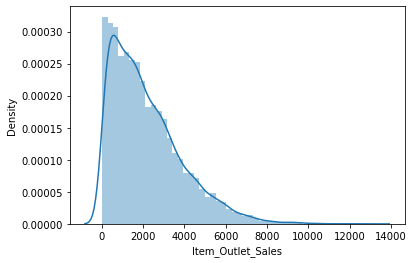

Skewness: 1.1775306028542798


In [15]:
#Target column

sns.distplot(Train_data['Item_Outlet_Sales'])
plt.show()

print('Skewness:',Train_data['Item_Outlet_Sales'].skew())

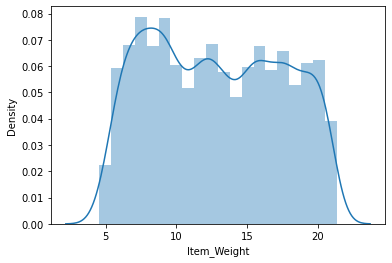

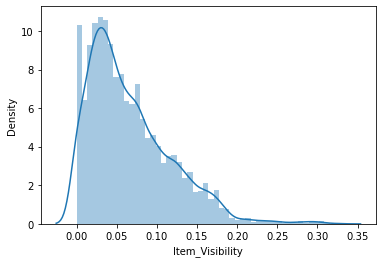

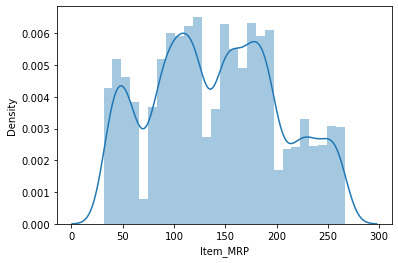

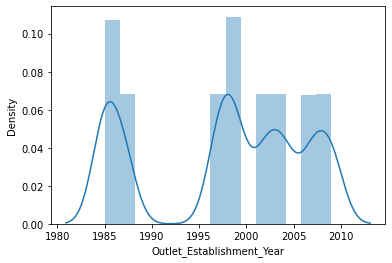

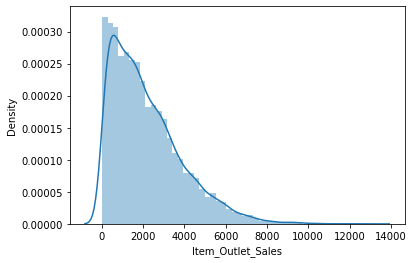

In [16]:
#Distribution plot for all numeric columns including target columns
#In for loop we give describe() function to descriminate numeric columns from categorical columns.
#Because describe() function give the summary of numeric columns
for i in Train_data.describe().columns:
    sns.distplot(Train_data[i].dropna())
    plt.show()

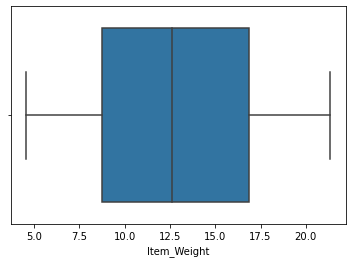

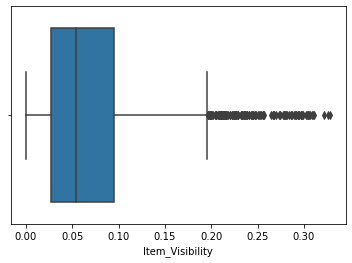

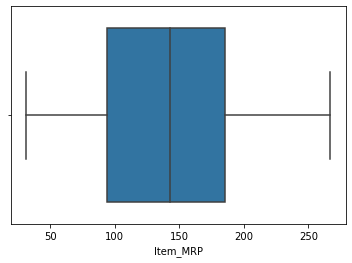

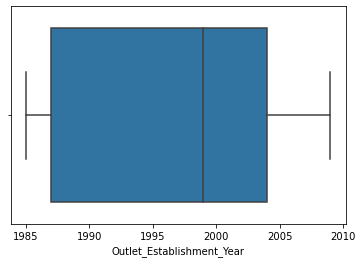

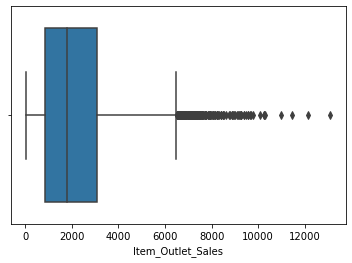

In [17]:
#We also use box plot to see the same informatiom

for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

##### 2-Categorical Columns

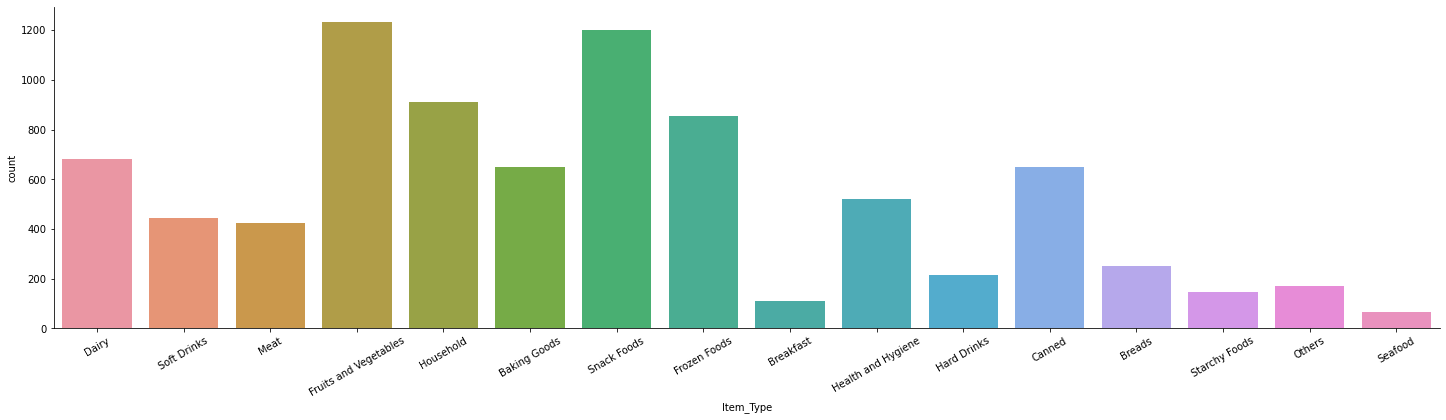

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [18]:
#Checking the distribution of various items

sns.catplot(x= "Item_Type", data=Train_data, kind='count',aspect=4)
plt.xticks(rotation=30)
plt.show()

print(Train_data['Item_Type'].value_counts())

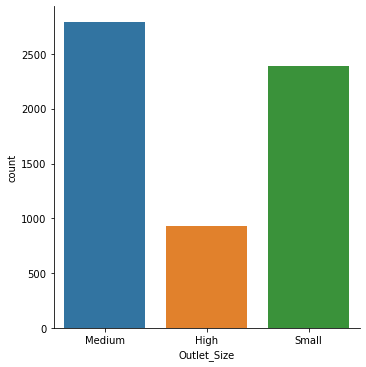

In [19]:
#Checking the no of outlet based on size

sns.catplot(x= "Outlet_Size", data= Train_data, kind = "count")
plt.show()

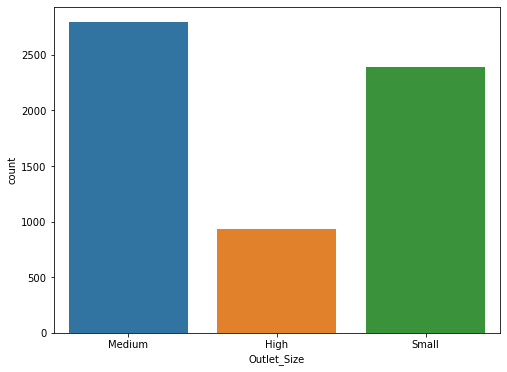

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [20]:
#Other way to plot the uper graph
plt.figure(figsize=(8,6))
sns.countplot(Train_data["Outlet_Size"])
plt.show()

print(Train_data['Outlet_Size'].value_counts())

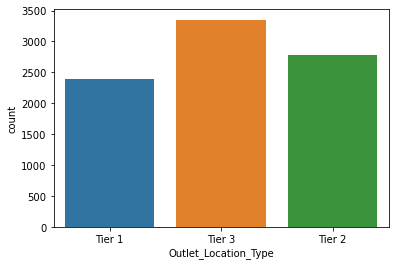

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [21]:
#Checking for Outlet Location Type

sns.countplot(Train_data["Outlet_Location_Type"])
plt.show()

print(Train_data['Outlet_Location_Type'].value_counts())

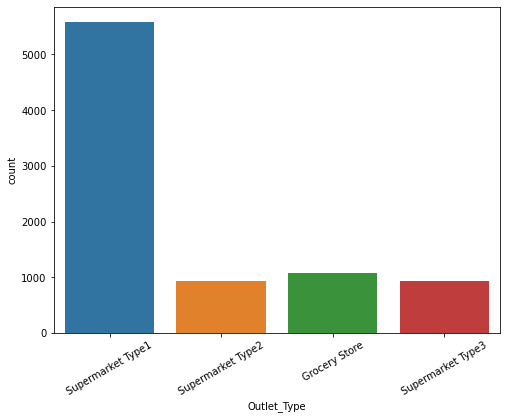

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [22]:
#Checking the outlet type

plt.figure(figsize=(8,6))
sns.countplot(Train_data['Outlet_Type'])
plt.xticks(rotation=30)   # x-axis value name rotation
plt.show()

print(Train_data['Outlet_Type'].value_counts())

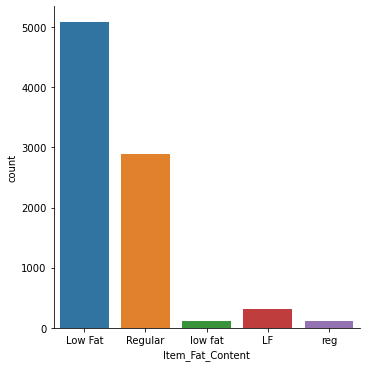

In [23]:
#Checking the fat content of item

sns.catplot(x= "Item_Fat_Content", data= Train_data, kind = "count")
plt.show()

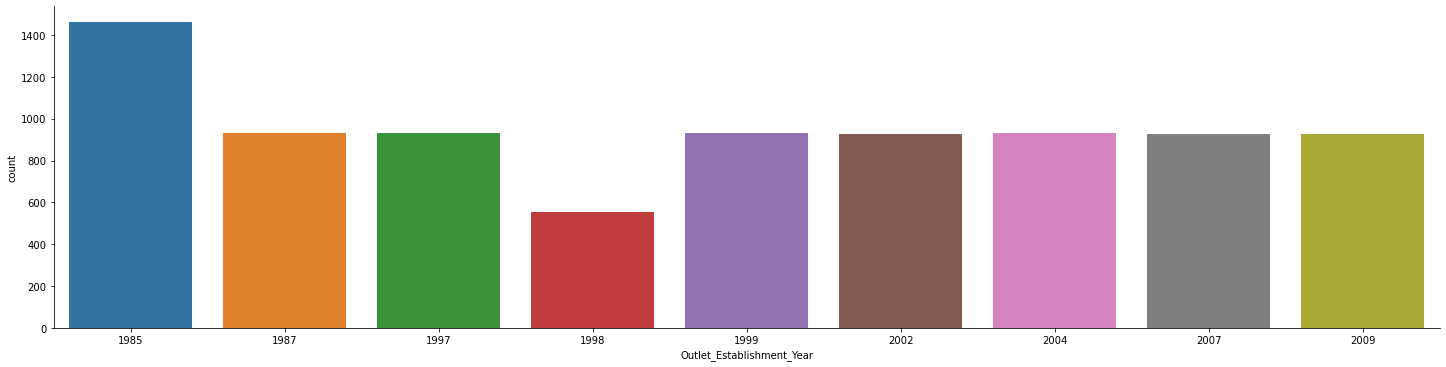

In [24]:
#Changing numeric column in categorical column
Train_data["Outlet_Establishment_Year"]=Train_data["Outlet_Establishment_Year"].astype("category")

#checking the Establishment year of outlet
sns.catplot(x= "Outlet_Establishment_Year", data= Train_data, kind = "count", aspect=4)
plt.show()

#### Bivariate Analysis

Text(0.5, 1.0, 'Item weight and Item outlet sales Analysis')

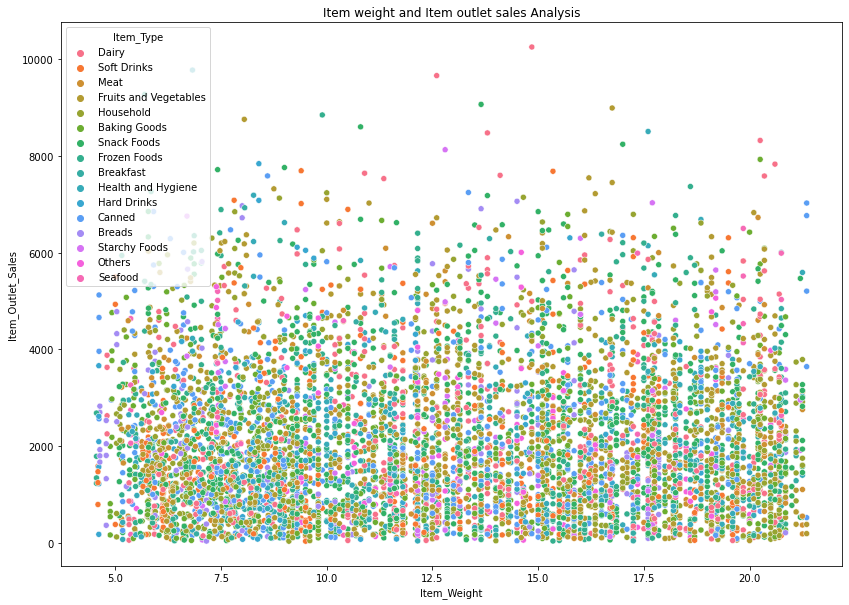

In [25]:
#Item weight and Item outlet sales Analysis

plt.figure(figsize=(14,10))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',data=Train_data)
plt.title("Item weight and Item outlet sales Analysis")

Text(0.5, 1.0, 'Item visibility and Item outlet sales Analysis')

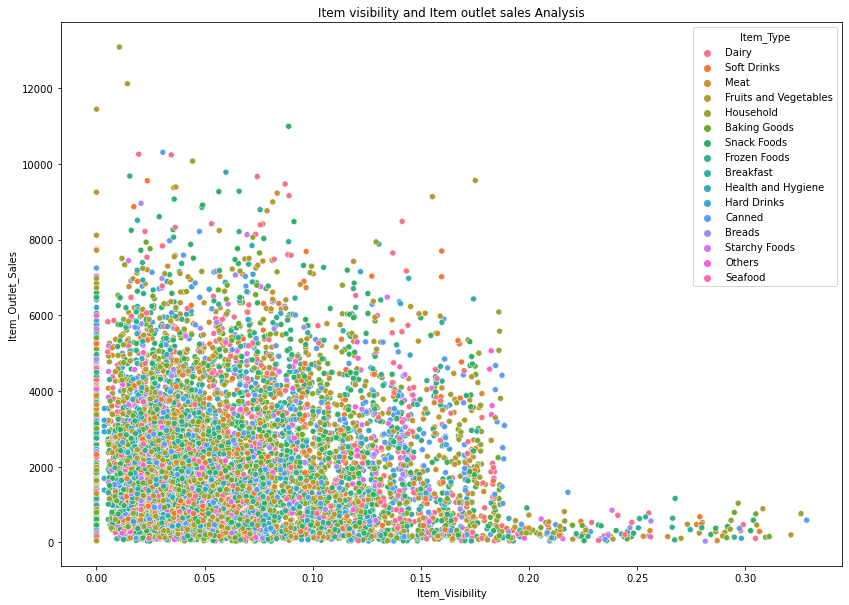

In [26]:
#Checking the item visibility abd their sales

plt.figure(figsize=(14,10))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',data=Train_data)
plt.title("Item visibility and Item outlet sales Analysis")

Text(0.5, 1.0, 'Item MRP and Item outlet sales Analysis')

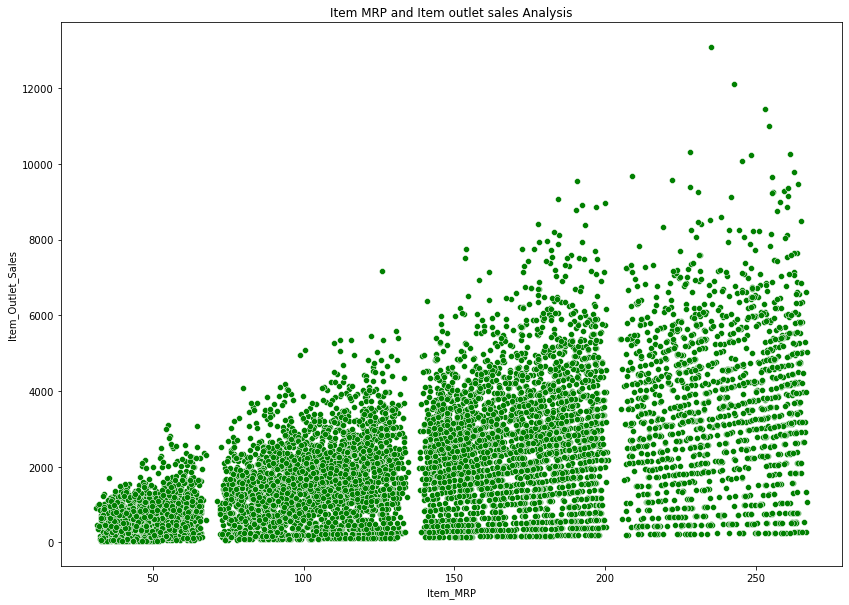

In [27]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',color='g',data=Train_data)
plt.title("Item MRP and Item outlet sales Analysis")

Text(0.5, 1.0, 'Impact of outlet Types on Outlet size')

<Figure size 1008x720 with 0 Axes>

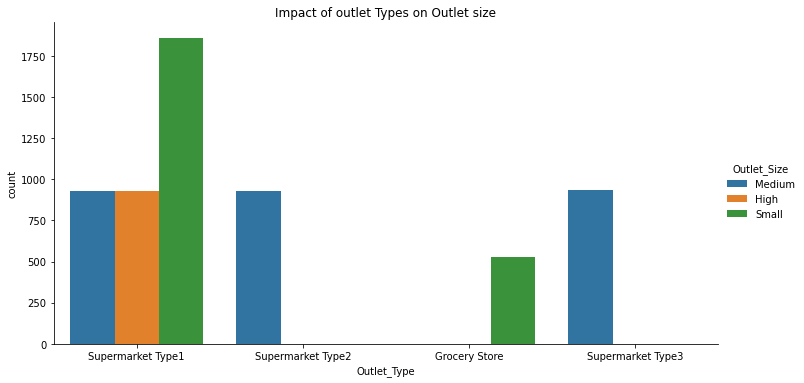

In [28]:
#Checking the outlet impact on outlet size

plt.figure(figsize=(14,10))
sns.catplot(x= "Outlet_Type", data= Train_data, kind = "count", aspect = 2, hue="Outlet_Size")
plt.title("Impact of outlet Types on Outlet size")

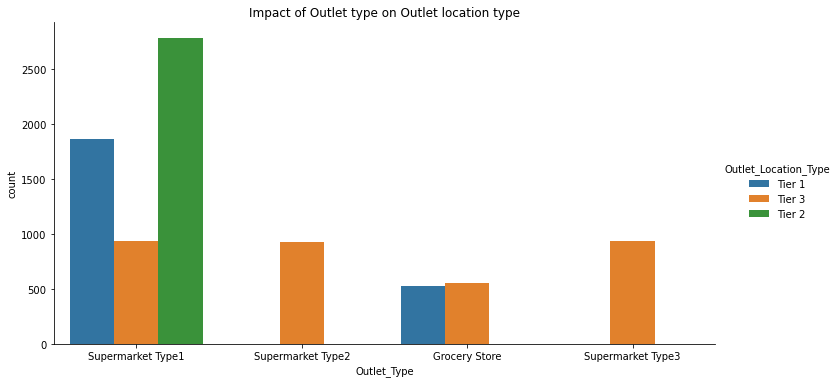

In [29]:
#Checking the outlet location based on their type

sns.catplot(x= "Outlet_Type", data= Train_data, kind = "count", aspect = 2, hue="Outlet_Location_Type")
plt.title('Impact of Outlet type on Outlet location type')
plt.show()

In [30]:
Item_Fat_Content_pivot=Train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot

,Item_Outlet_Sales
Item_Fat_Content,
LF,1797.6600
Low Fat,1765.7016
Regular,1845.5976
low fat,1614.2321
reg,1492.7236


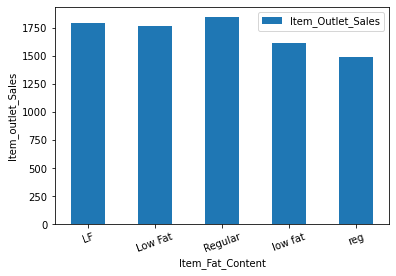

In [31]:
#plotting the Item_Fat_Content with respect to Item_outlet_Sales
Item_Fat_Content_pivot.plot(kind='bar')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_outlet_Sales')
plt.xticks(rotation=20)
plt.show()

In [32]:
#Checking no of items and their values in Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [33]:
#Replacing some items because same items exist with different name
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [34]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [35]:
Train_data['Item_Fat_Content']=Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

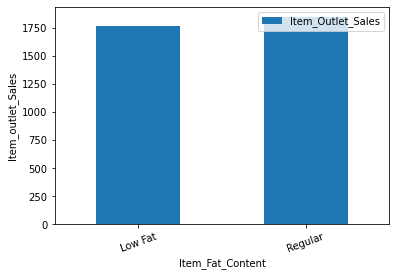

In [36]:
Item_Fat_Content_pivot=Train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot

Item_Fat_Content_pivot.plot(kind='bar')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_outlet_Sales')
plt.xticks(rotation=20)
plt.show()

In [37]:
#Checking the correlation of train data

Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


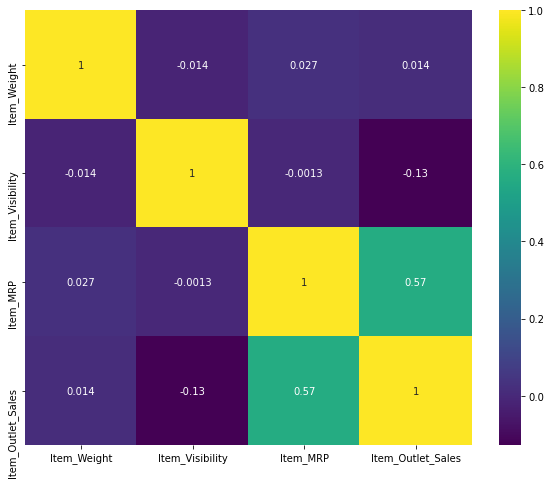

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(),annot=True,cmap='viridis')
plt.show()

## Treating the missing values

In [39]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

<AxesSubplot:>

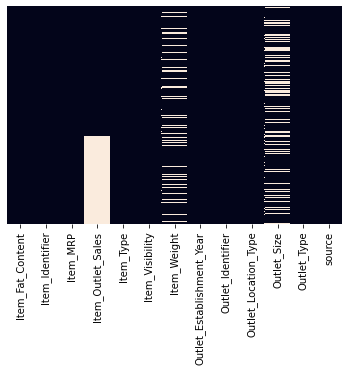

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [41]:
#Item Weight
#Filling NaN values with mean

df['Item_Weight'].mean()

12.792854228644991

In [42]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [43]:
#Outlet Size
#Filling NaN value with mode

df['Outlet_Size'].value_counts()      #here Medium is frequently arrived

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [44]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [45]:
#Item_Outlet_Sales
df['Item_Outlet_Sales'].mean()

2181.2889135750365

In [46]:
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean(),inplace=True)

In [47]:
df.isnull().sum()  # We don't have any null value
#Our test data has no column Item_Outlet_Sales

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

879




<AxesSubplot:ylabel='Frequency'>

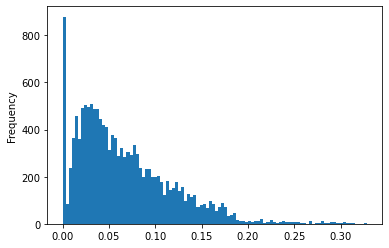

In [48]:
#The Item_Visibility had the minimum value 0. Item_visibilty contributes Sales so we can consider them as missing value and 
#treat them Lets replace them with the median visibility of that particular item

print(df[df['Item_Visibility']==0]['Item_Visibility'].count())
print("\n")

df['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [49]:
#Checking the visibility of items where visivility is zero 
df['Item_Visibility']=df['Item_Visibility'].replace(0.00,np.NaN)
df['Item_Visibility'].isna().sum()

879

In [50]:
#Filling the Item visibility with median
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

0




<AxesSubplot:ylabel='Frequency'>

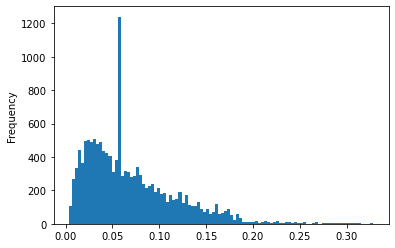

In [51]:
print(df[df['Item_Visibility']==0]['Item_Visibility'].count())

print("\n")

df['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [52]:
#checking how many outlet is established in particular year

df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [53]:
#Introducing a new column No of years of establishment of outlet

df['Outlet_Year']=2021-df['Outlet_Establishment_Year']

In [54]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Year
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,22
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,12
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,22
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057851,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Train,23
4,Low Fat,NCD19,53.8614,994.7052,Household,0.057851,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,34


In [55]:
#Checking the no of items count in item type
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [56]:
#Chedcking the no of items in Item Identifier
df['Item_Identifier'].value_counts()

FDP03    10
FDO31    10
FDC57    10
NCO30    10
FDH27    10
         ..
FDM50     7
NCW54     7
FDI46     7
FDH58     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [57]:
#Here only three item category
#Creating a new column New_Item_Type
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [58]:
#Rename them
df['New_Item_Type']=df['New_Item_Type'].map({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_Type, dtype: int64

In [59]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Year,New_Item_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,22,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,12,Drink
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,22,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057851,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Train,23,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.057851,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,34,Non-Consumable


In [60]:
#If a product is Non-Consumable them why it contains fat content

df.loc[df['New_Item_Type']=="Non-Consumable","Item_Fat_Content"]='Non-Edible'

df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [61]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Year,New_Item_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,22,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,12,Drink
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,22,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057851,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Train,23,Food
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.057851,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,34,Non-Consumable


#### Dealing with categorical Variables

In [62]:
#We will convert all categorical variables into numeric types using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#New Variable for outlet
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])

col=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_Type','Outlet']
for i in col:
    df[i]=le.fit_transform(df[i])

In [63]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Year,New_Item_Type,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,Train,22,1,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,Train,12,0,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,Train,22,1,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057851,19.20,1998,OUT010,2,1,0,Train,23,1,0
4,1,NCD19,53.8614,994.7052,Household,0.057851,8.93,1987,OUT013,2,0,1,Train,34,2,1


In [64]:
#Now create a dummy variable

df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_Type','Outlet'])
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Year,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Train,22,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Train,12,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Train,22,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057851,19.20,1998,OUT010,Train,23,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.057851,8.93,1987,OUT013,Train,34,...,0,1,0,0,0,0,0,0,0,0


###### Dropping Column

In [65]:
df.drop ( ["Item_Type","Outlet_Establishment_Year",'Item_Identifier','Outlet_Identifier'] , inplace = True , axis = 1)
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,source,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,Train,22,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,Train,12,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,Train,22,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.057851,19.20,Train,23,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.057851,8.93,Train,34,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [66]:
#Copy the dataframe
df1=df.copy()

In [67]:
df1.drop ( ["source"] , inplace = True , axis = 1)
df1.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,22,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,12,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,22,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.057851,19.20,23,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.057851,8.93,34,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Removing Outliers

In [68]:
df2=df1.copy()
df2.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,22,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,12,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,22,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.057851,19.20,23,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.057851,8.93,34,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [69]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[1.75251118e+00, 1.17553945e+00, 1.09868784e+00, ...,
        3.49733509e-01, 3.49987017e-01, 2.85724885e+00],
       [1.49369650e+00, 1.31475456e+00, 1.03231908e+00, ...,
        3.49733509e-01, 3.49987017e-01, 3.49987017e-01],
       [9.87396609e-03, 6.35631532e-02, 1.08404619e+00, ...,
        3.49733509e-01, 3.49987017e-01, 2.85724885e+00],
       ...,
       [3.58557881e-01, 2.06419062e-15, 8.20798288e-02, ...,
        2.85931995e+00, 3.49987017e-01, 3.49987017e-01],
       [1.18574722e+00, 2.06419062e-15, 2.39971437e-01, ...,
        3.49733509e-01, 3.49987017e-01, 3.49987017e-01],
       [9.85893877e-01, 2.06419062e-15, 7.22810755e-01, ...,
        2.85931995e+00, 3.49987017e-01, 3.49987017e-01]])

In [70]:
threshold=3
print(np.where(z>3))

(array([    1,     3,    18, ..., 14191, 14191, 14197], dtype=int64), array([18, 21, 18, ...,  2, 21, 18], dtype=int64))


In [71]:
df2_new=df2[(z<3).all(axis=1)]

In [72]:
print(df2.shape,'\t',df2_new.shape)

(14204, 31) 	 (11017, 31)


In [73]:
df1=df2_new
df1.shape

(11017, 31)

#### Model Training

In [74]:
x=df1.drop(['Item_Outlet_Sales'],axis=1)
x.shape

(11017, 30)

In [75]:
y=df1['Item_Outlet_Sales']
y.shape

(11017,)

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [77]:
#Spliting the data in training and testing 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [78]:
print(x_train.shape,'\t',x_test.shape)

(8593, 30) 	 (2424, 30)


In [79]:
print(y_train.shape,'\t',y_test.shape)

(8593,) 	 (2424,)


#### LinearRegression

In [80]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.27911687072349434


In [81]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 837204.6632197008
MAE: 716.9774235270992
r2_score: -1.594799959575837


### Ridge

In [82]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.2791168441566695


In [96]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 837196.6495352107
MAE: 716.9694417147721
r2_score: -1.5949755034187638


##### SVR

SVR(kernel='linear')

In [83]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.023307297663633264


In [84]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 1119882.9881209813
MAE: 678.5425111452214
r2_score: -1189.8517360499932


##### SVR(kernel='poly')

In [85]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

-0.0050299916568326


In [86]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 1152443.572571985
MAE: 678.565616843106
r2_score: -25123623.49824338


##### Svr(kernel='rbf')

In [87]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.006201884143059666


In [88]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 1139030.3945062154
MAE: 677.4832990816101
r2_score: -4766.268341664228


##### DecisionTreeRegressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [90]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 1754580.164374028
MAE: 971.1894388968659
r2_score: -0.34895024539453723


#### GradientBoostingRegressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.3308153470462887


In [92]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 841626.6983050167
MAE: 724.4957899844565
r2_score: -1.506630058235729


#### RandomForestRegressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.8854808183930375


In [94]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 941186.4489231093
MAE: 761.3455445964296
r2_score: -1.0639100971886957


##### cross validation

In [95]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 902017.760487, 391712.593070
R    : 902002.518891, 391722.026341
svr    : 1251151.585878, 868650.842864
svr_p    : 1181995.420079, 953069.366856
svr_r    : 1176281.606179, 954567.139609
RF    : 997741.505207, 356295.475938
DTR    : 1810705.111358, 306227.727725
GBR    : 905168.521844, 389105.326190


In [99]:
from sklearn.model_selection import GridSearchCV
copy_X = [True,False]
solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
normalize = [True,False] 

hyperF = dict(copy_X = copy_X, solver = solver,  
              normalize = normalize)
             

gridF = GridSearchCV(Ridge(), hyperF, cv =10 , verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   19.3s finished


In [100]:
bestF.best_params_

{'copy_X': False, 'normalize': False, 'solver': 'saga'}

In [109]:
# building the model with best parameters
from sklearn import metrics
tuned_model = Ridge(copy_X= False, normalize= False, solver ='saga')
tuned_model.fit(x_train, y_train)
prediction = tuned_model.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test,prediction))))
print("MAE: {}".format(np.sqrt(metrics.mean_absolute_error(y_test,prediction))))
print("r2_score:",r2_score(y_test,prediction))



RMSE: 914.910648010726
MAE: 26.774507640986975
r2_score: 0.2723879622802138


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

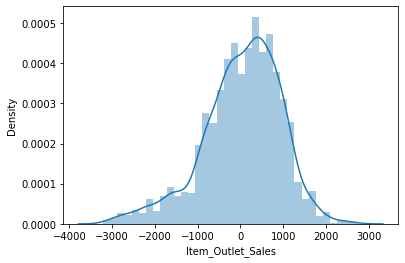

In [102]:
sns.distplot(prediction-y_test)

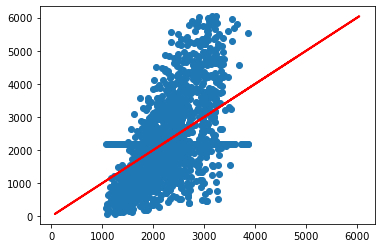

In [106]:
plt.scatter(prediction,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

#### saving the model

In [104]:
import joblib
joblib.dump(tuned_model,'Bigdatamart.pkl')

['Bigdatamart.pkl']